In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [4]:
df = pd.read_csv('data/cleaned_311_test_2015.csv', header=0, sep=',', quotechar='"',parse_dates=['created_date', 'closed_date'],
     infer_datetime_format=True)
df.head(5)


,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,city,community_board,borough,latitude,longitude,location
0,0,36335488,2017-06-01,2017-06-23,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10474,BRONX,02 BRONX,BRONX,40.812797,-73.886981,"(40.81279663744078, -73.8869808964065)"
1,1,36334571,2017-06-01,2017-06-22,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11215,BROOKLYN,06 BROOKLYN,BROOKLYN,40.668242,-73.989604,"(40.66824162997938, -73.98960394471317)"
2,2,36334446,2017-06-01,2017-06-21,DOHMH,Department of Health and Mental Hygiene,Unsanitary Pigeon Condition,Pigeon Waste,10303,STATEN ISLAND,01 STATEN ISLAND,STATEN ISLAND,40.626336,-74.174961,"(40.62633610844385, -74.17496135020113)"
3,3,36332405,2017-06-01,2017-06-22,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11215,BROOKLYN,06 BROOKLYN,BROOKLYN,40.668242,-73.989604,"(40.66824162997938, -73.98960394471317)"
4,4,36332388,2017-06-01,2017-06-21,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,11105,Astoria,01 QUEENS,QUEENS,40.777379,-73.909192,"(40.777379055532506, -73.9091923175842)"


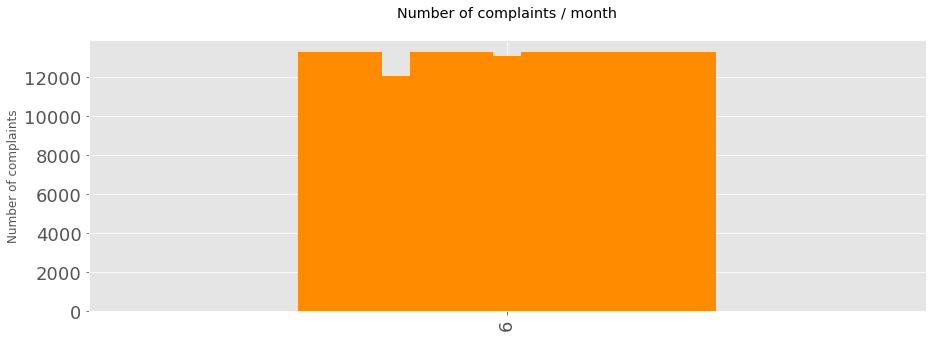

In [5]:
# Plot trip counts
df['month'] = df['created_date'].apply(lambda x: x.month)
month_counts = df.groupby(['month'],sort = True).count()

month_counts.plot(kind = 'bar', stacked = False, figsize = (15, 5),
                  color = 'darkorange', linewidth = 2, legend = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Number of complaints / month\n')
plt.xlabel('')
plt.ylabel('Number of complaints')

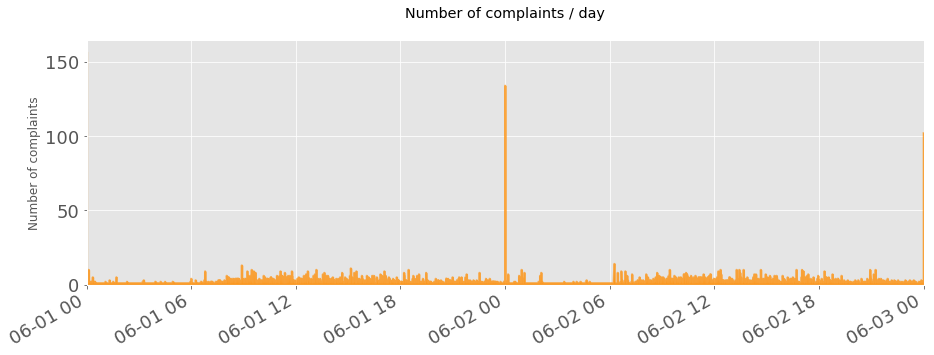

In [6]:
day_counts = df['created_date'].value_counts()

# Plot trip counts
day_counts.plot(kind = 'area', stacked = False, figsize = (15, 5),
                  color = 'darkorange', linewidth = 2, legend = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Number of complaints / day\n')
plt.xlabel('')
plt.ylabel('Number of complaints')

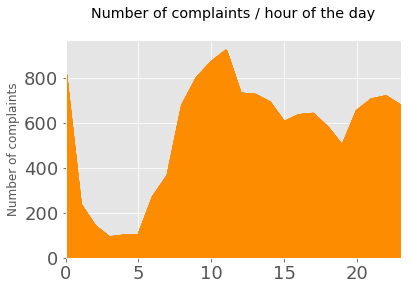

In [7]:
df['hour'] = df['created_date'].apply(lambda x: x.hour)
hour_counts = df.groupby(['hour'],sort = True).count()

# Plot trip counts
hour_counts.plot(kind = 'area', stacked = False,
                  color = 'darkorange', linewidth = 2, legend = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Number of complaints / hour of the day\n')
plt.xlabel('')
plt.ylabel('Number of complaints')

In [8]:
complaint_count = df['complaint_type'].value_counts()

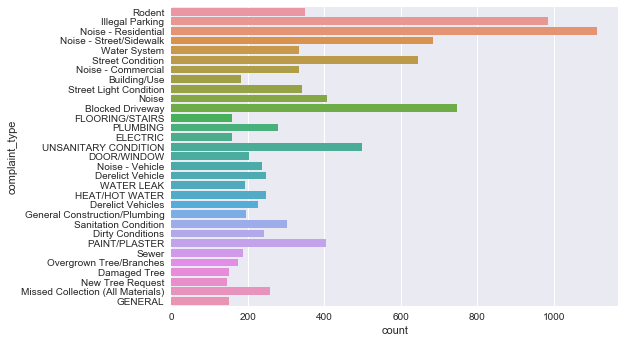

In [9]:
import seaborn as sns
sns.set(style="darkgrid")

#Dropping unsignificant complaints
complaint_count = df['complaint_type'].value_counts()
significant_indices = [True if complaint_count[x] > sum(complaint_count)/100 else False for x in df['complaint_type']]
df = df[significant_indices]
df['complaint_type'].value_counts()

#counting by complaint type
complaint_count = sns.countplot(y="complaint_type", data=df)